<a href="https://colab.research.google.com/github/rashmiravikumar04/Mtech_Ai/blob/main/LabWork/20230806_Lab_3_MTech_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the dataset


*   Link : https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess?datasetId=316368&sortBy=voteCount
*   Short Description :
    it's only based on 2 speakers, a young female and an older female
    1. Angry
    2. Happy
    3. Sad
    4. Pleasant Surprise
    5. Neurtal
    6. Disgust










In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
!pip install --upgrade librosa

In [3]:
import os

# Set Kaggle API credentials path
os.environ['KAGGLE_CONFIG_DIR'] = '/root/.kaggle/'

# Download the dataset
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

# Unzip the downloaded file
!unzip -q '*.zip' -d data

 99% 422M/428M [00:02<00:00, 188MB/s]
100% 428M/428M [00:02<00:00, 161MB/s]


In [4]:
import tensorflow as tf
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
import IPython.display as ipd

In [5]:
# for dirname, _, filenames in os.walk('/content/data/TESS Toronto emotional speech set data'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [6]:
files = []
class_series = []

In [7]:
#/content/data/TESS Toronto emotional speech set data/YAF_disgust/YAF_have_disgust.wav
for dirname, _, filenames in os.walk('/content/data/TESS Toronto emotional speech set data'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)

        class_series.append(filepath.split('/')[-1].replace('.wav','').split('_'))
        files.append(filepath)
data = pd.DataFrame(class_series, columns=['actress', 'word', 'class'])
data['filename'] = files
data = data.sample(frac=1) #Shuffling and Resetting Index
data = data.reset_index(drop=True)
data.head()

,actress,word,class,filename
0,YAF,pass,ps,/content/data/TESS Toronto emotional speech se...
1,OAF,fail,angry,/content/data/TESS Toronto emotional speech se...
2,YAF,life,ps,/content/data/TESS Toronto emotional speech se...
3,OAF,name,disgust,/content/data/TESS Toronto emotional speech se...
4,OAF,rough,happy,/content/data/TESS Toronto emotional speech se...


In [8]:
#files

In [9]:
data.shape

(2800, 4)

    ss = '/content/emotion_speech/YAF_neutral/YAF_germ_neutral.wav'
    ss.split('/')[-1].replace('.wav','').split('_')

In [10]:
#kitne feelings
data['class'].value_counts()

ps         400
angry      400
disgust    400
happy      400
fear       400
sad        400
neutral    400
Name: class, dtype: int64

In [11]:
#kitne actress
data['actress'].value_counts()

YAF    1400
OAF    1399
OA        1
Name: actress, dtype: int64

In [12]:
# def get_audio_feature_plots(path, class_, word, actress):
#     x , sr = librosa.load(path)
#     plt.figure(figsize=(20, 5))
#     plt.title('Waveplot of '+class_+' '+actress+' for word '+word)
#     librosa.display.waveplot(x, sr=sr)
#     plt.show()

#     plt.figure(figsize=(20, 6))
#     plt.title('MFCC Spectral of '+class_+' '+actress+' for word '+word)
#     mfccs = librosa.feature.mfcc(y=x, sr=sr) # n_mfcc
#     librosa.display.specshow(mfccs, sr=sr, x_axis='time')
#     print(mfccs.shape)
#     plt.show()

#     plt.figure(figsize=(20, 6))
#     plt.title('Mel Spectrogram of '+class_+' '+actress+' for word '+word)
#     mel_spec = librosa.feature.melspectrogram(y=x, sr=sr)
#     librosa.display.specshow(mel_spec, sr=sr, x_axis='time')
#     plt.show()

In [13]:
data.head()

,actress,word,class,filename
0,YAF,pass,ps,/content/data/TESS Toronto emotional speech se...
1,OAF,fail,angry,/content/data/TESS Toronto emotional speech se...
2,YAF,life,ps,/content/data/TESS Toronto emotional speech se...
3,OAF,name,disgust,/content/data/TESS Toronto emotional speech se...
4,OAF,rough,happy,/content/data/TESS Toronto emotional speech se...


In [ ]:
# import librosa
# import matplotlib.pyplot as plt
# import IPython.display as ipd

# def get_audio_feature_plots(path, class_, word, actress):
#     x, sr = librosa.load(path)
#     plt.figure(figsize=(20, 5))
#     plt.title('Waveplot of ' + class_ + ' ' + actress + ' for word ' + word)
#     plt.plot(x)
#     plt.xlabel('Samples')
#     plt.ylabel('Amplitude')
#     plt.show()

#     # Rest of the code for MFCC and Mel spectrogram plots

# # Example usage
# sample = data[(data['class'] == 'angry') & (data['word'] == 'calm') & (data['actress'] == 'OAF')]
# get_audio_feature_plots(sample['filename'].values[0], sample['class'].values[0], sample['word'].values[0], sample['actress'].values[0])
# ipd.Audio(sample['filename'].values[0])


In [18]:
def get_audio_feature_plots(path, class_, word, actress):
    x, sr = librosa.load(path)
    plt.figure(figsize=(20, 5))
    plt.title('Waveplot of ' + class_ + ' ' + actress + ' for word ' + word)
    plt.plot(x)
    plt.show()

    plt.figure(figsize=(20, 6))
    plt.title('MFCC Spectral of ' + class_ + ' ' + actress + ' for word ' + word)
    mfccs = librosa.feature.mfcc(y=x, sr=sr)  # n_mfcc
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    print(mfccs.shape)
    plt.show()

    plt.figure(figsize=(20, 6))
    plt.title('Mel Spectrogram of ' + class_ + ' ' + actress + ' for word ' + word)
    mel_spec = librosa.feature.melspectrogram(y=x, sr=sr)
    librosa.display.specshow(mel_spec, sr=sr, x_axis='time')
    plt.show()

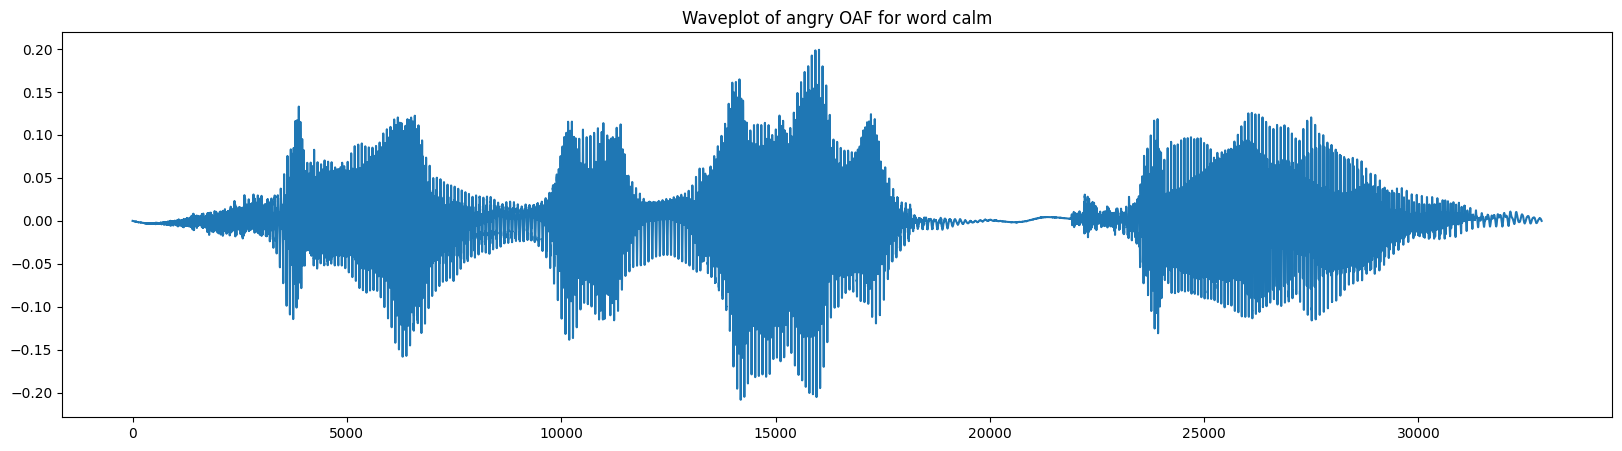

(20, 65)


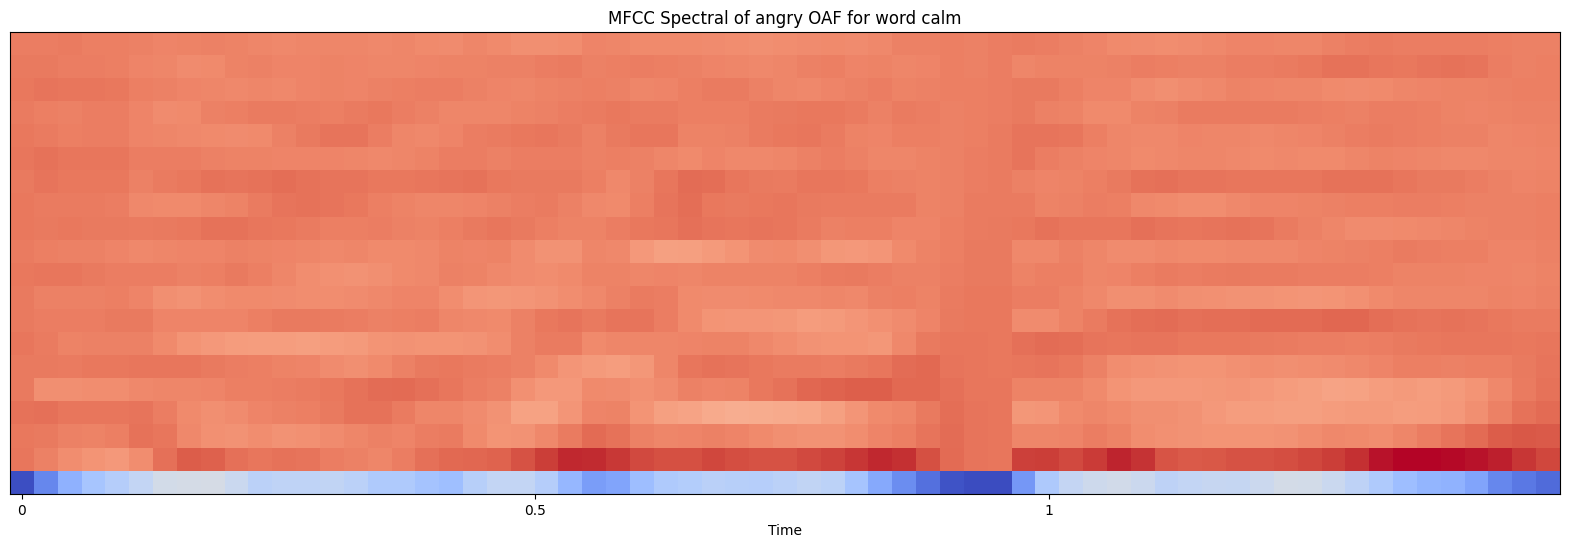

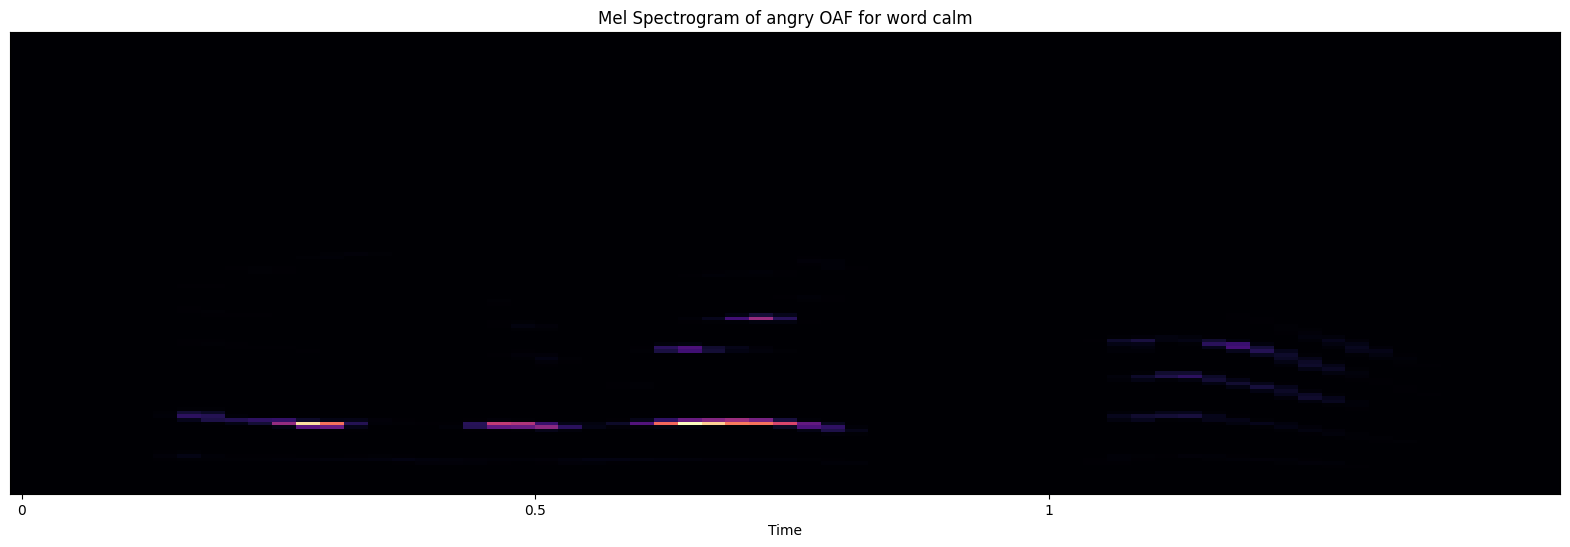

In [17]:
sample = data[(data['class'] == 'angry') & (data['word'] == 'calm') & (data['actress'] == 'OAF')]
get_audio_feature_plots(sample['filename'].values[0], sample['class'].values[0], sample['word'].values[0], sample['actress'].values[0])
ipd.Audio(sample.filename.values[0])

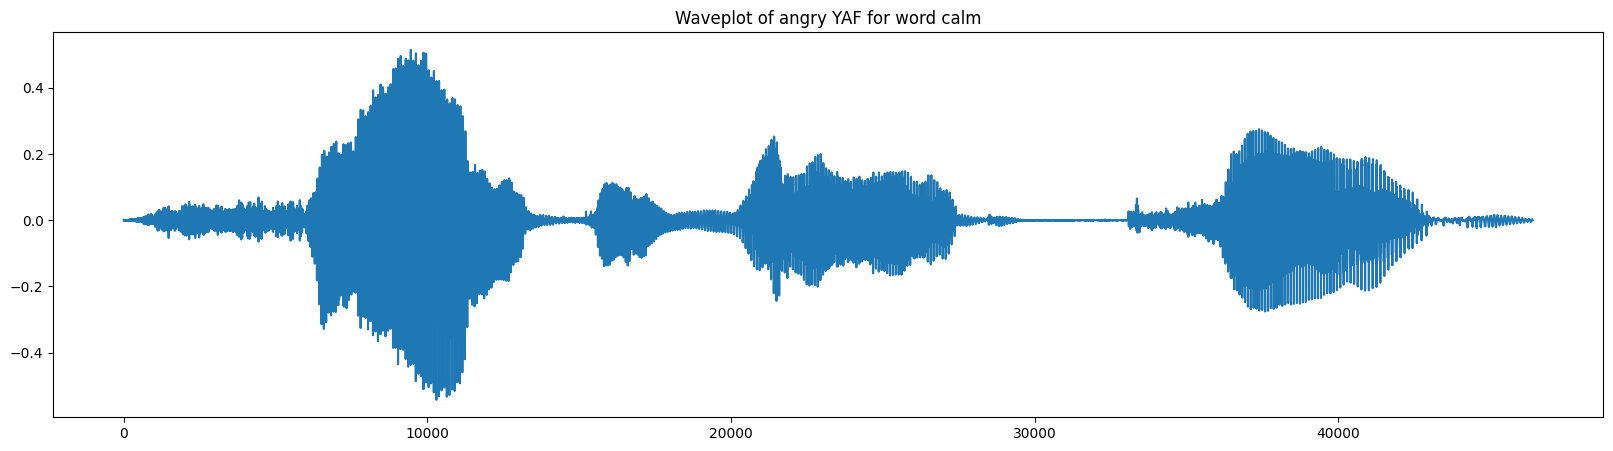

(20, 91)


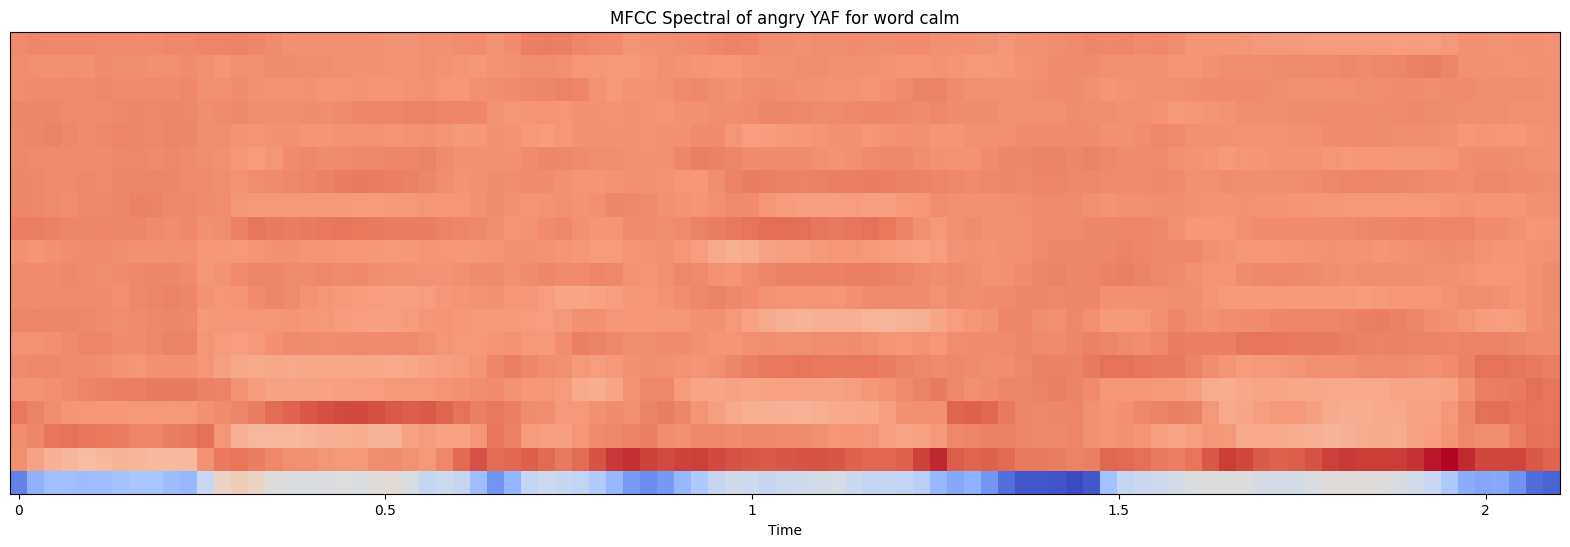

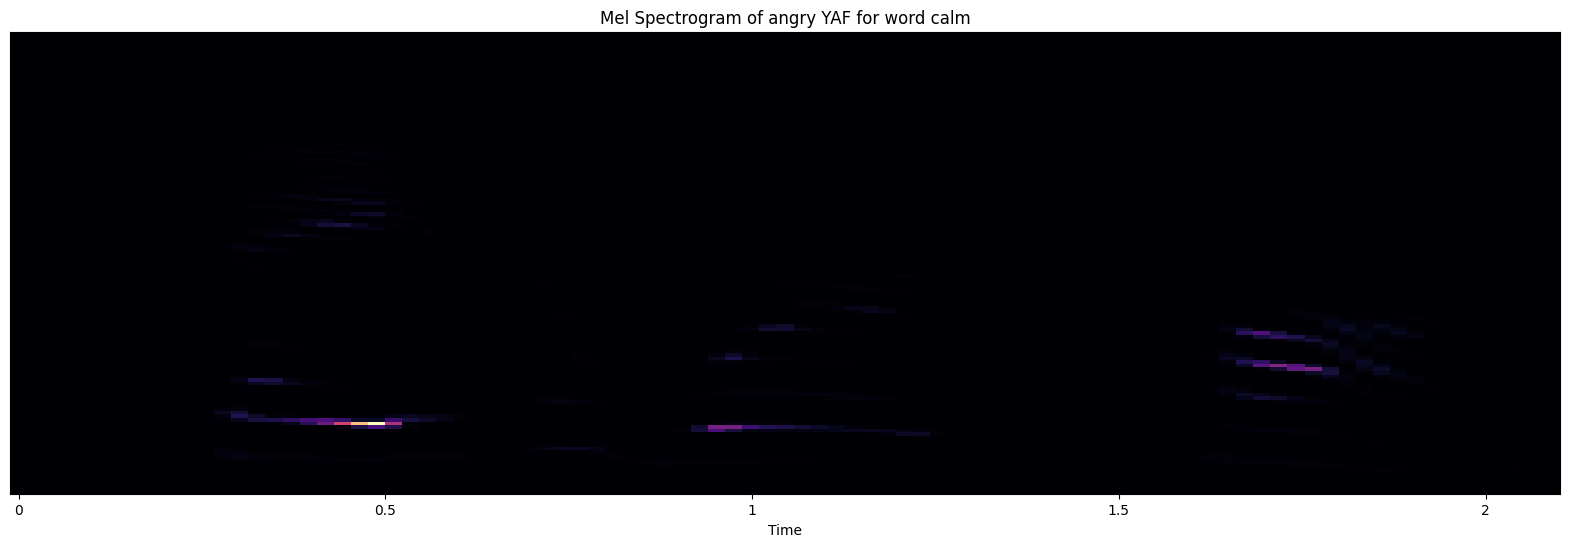

In [19]:
sample = data[(data['class'] == 'angry') & (data['word'] == 'calm') & (data['actress'] == 'YAF')]
get_audio_feature_plots(sample['filename'].values[0], sample['class'].values[0], sample['word'].values[0], sample['actress'].values[0])
ipd.Audio(sample.filename.values[0])

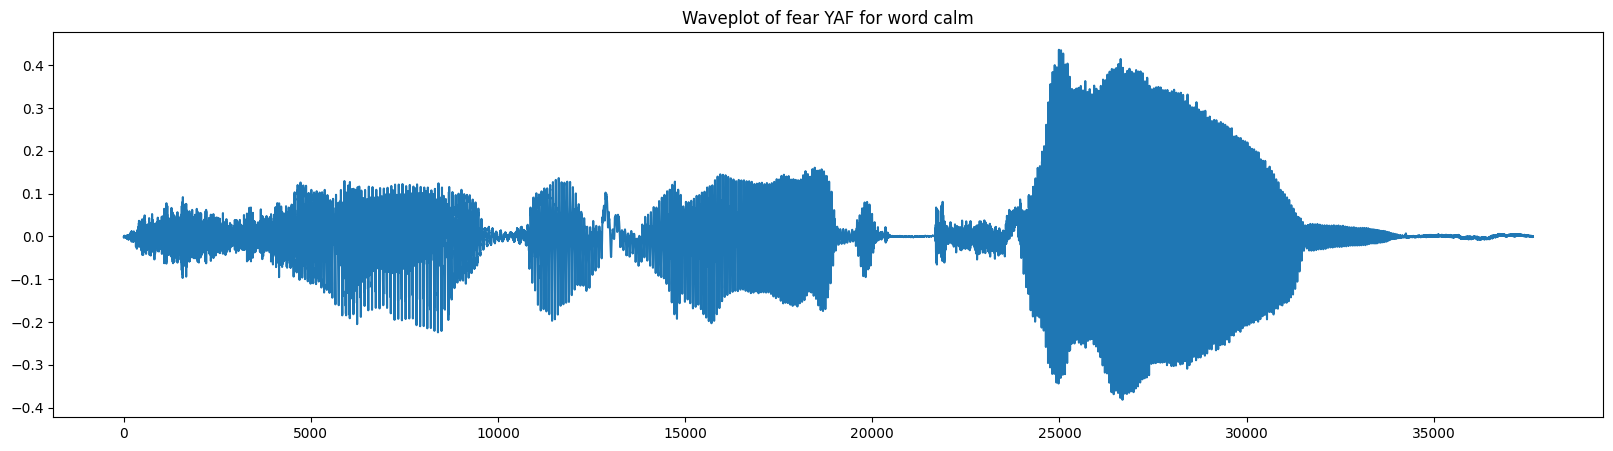

(20, 74)


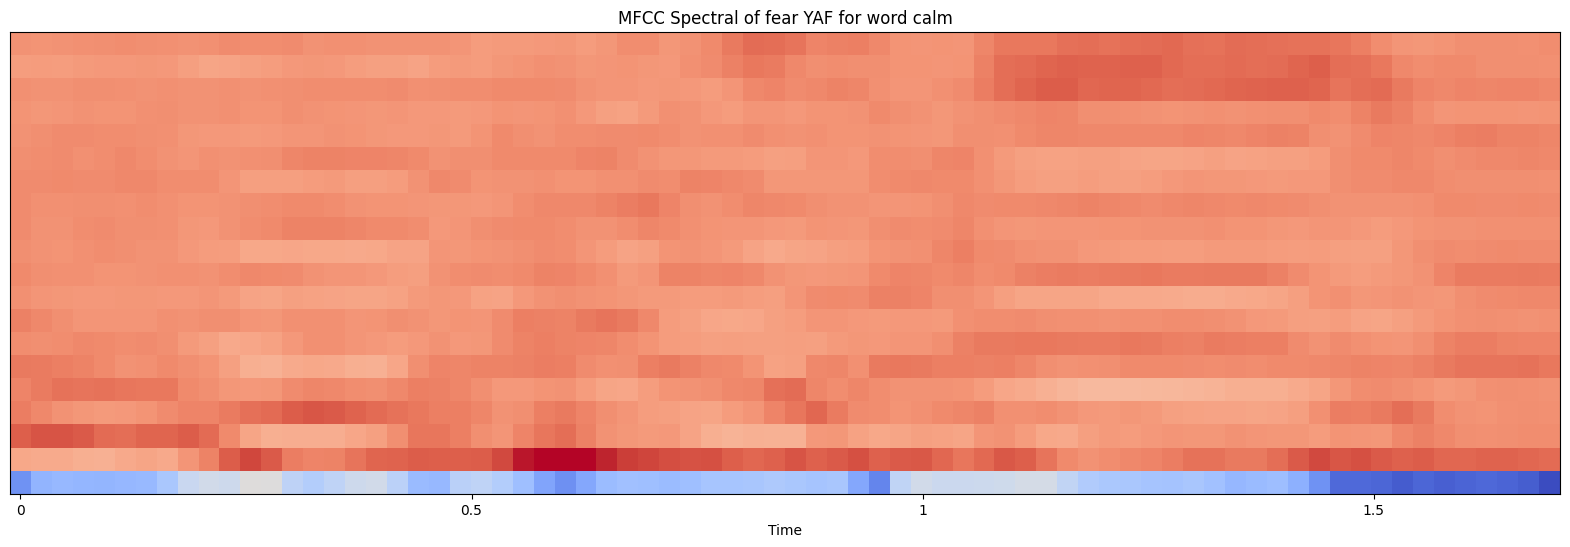

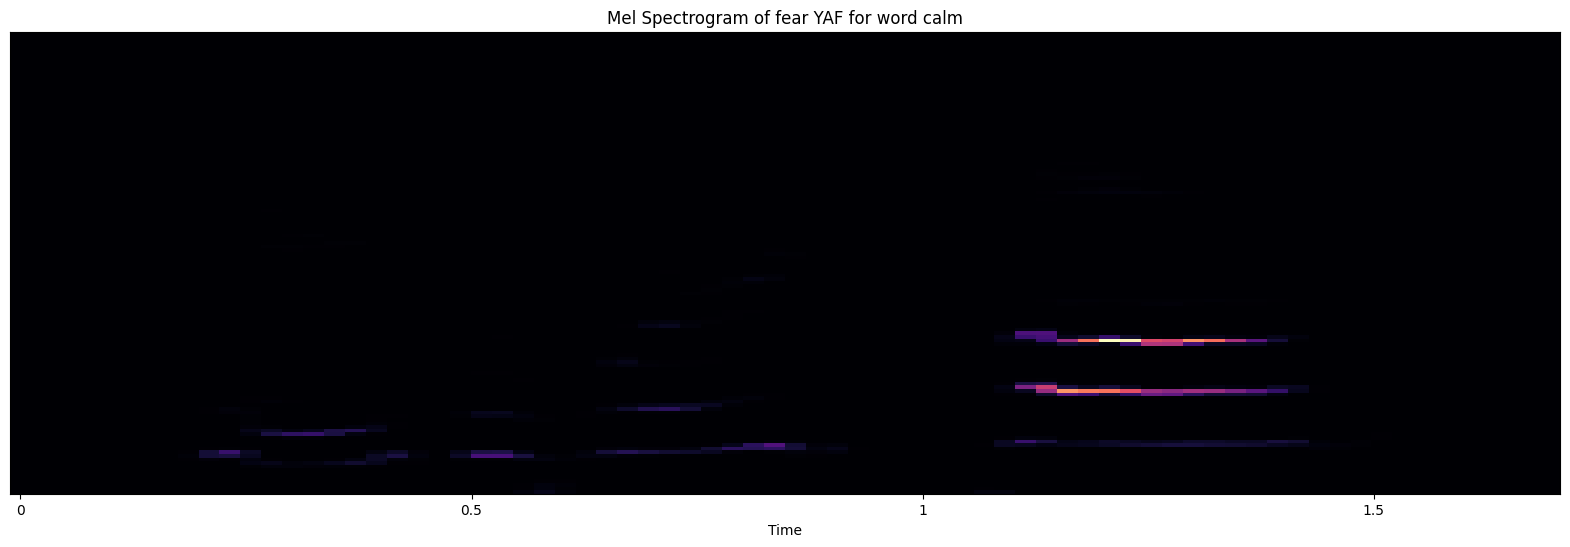

In [20]:
sample = data[(data['class'] == 'fear') & (data['word'] == 'calm') & (data['actress'] == 'YAF')]
get_audio_feature_plots(sample['filename'].values[0], sample['class'].values[0], sample['word'].values[0], sample['actress'].values[0])
ipd.Audio(sample.filename.values[0])

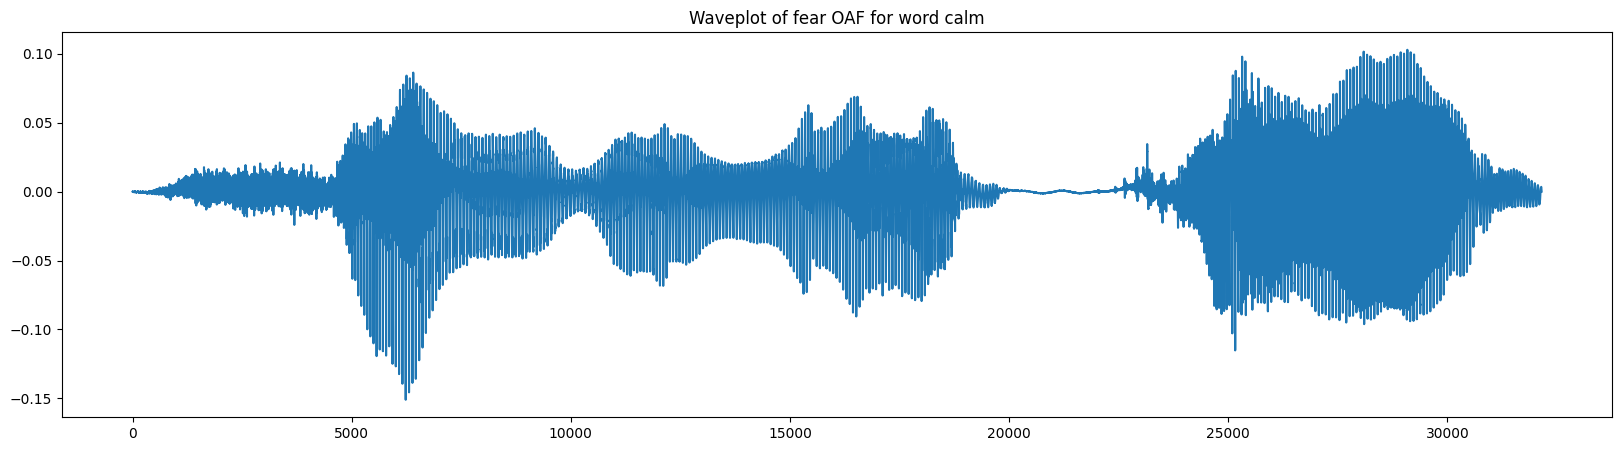

(20, 63)


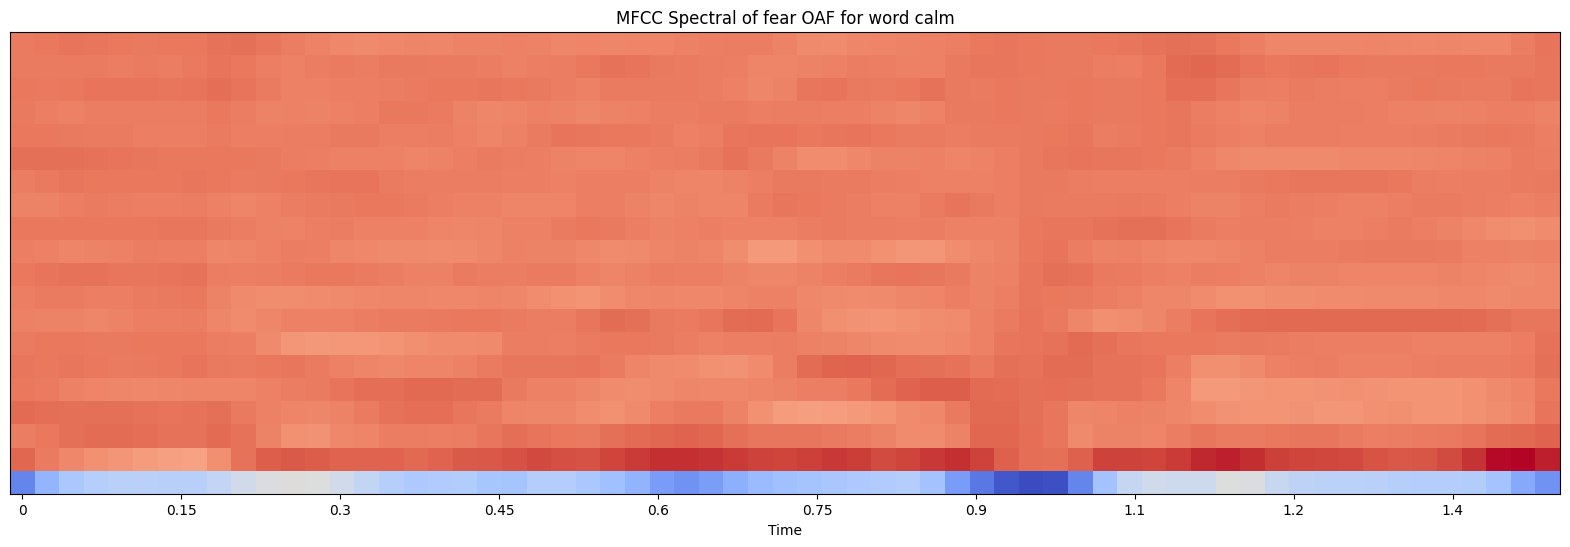

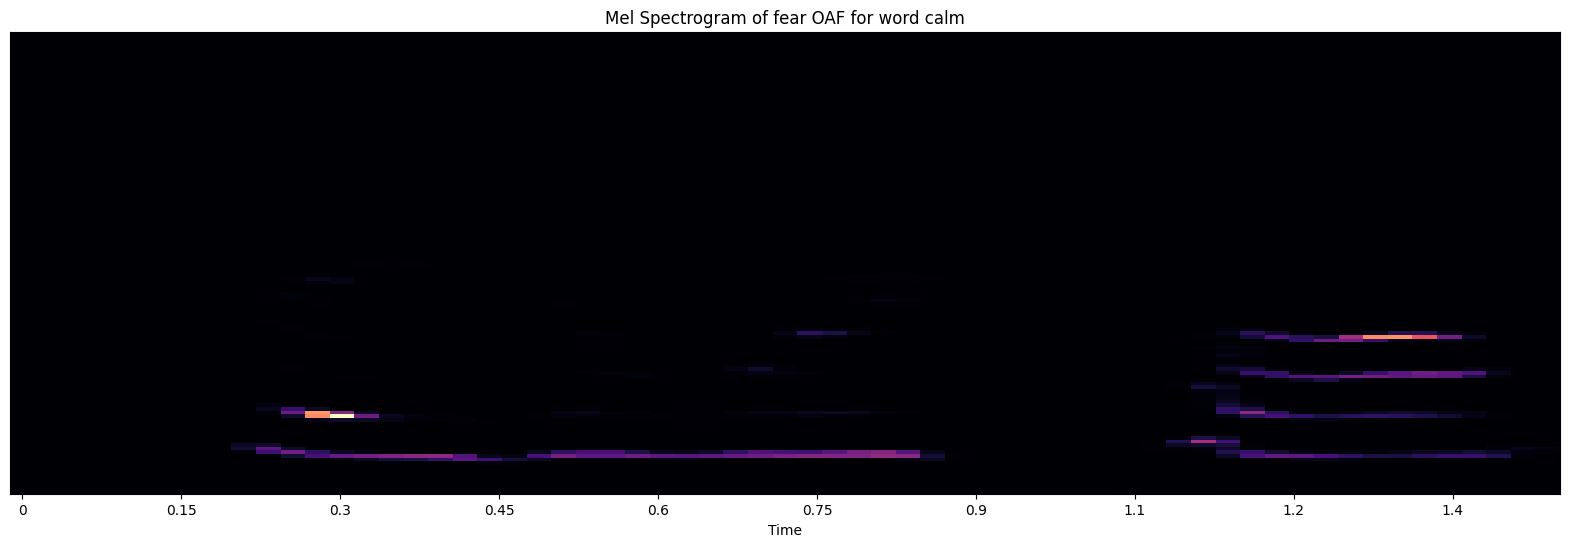

In [21]:
sample = data[(data['class'] == 'fear') & (data['word'] == 'calm') & (data['actress'] == 'OAF')]
get_audio_feature_plots(sample['filename'].values[0], sample['class'].values[0], sample['word'].values[0], sample['actress'].values[0])
ipd.Audio(sample.filename.values[0])

# Modelling

## Feature Extractions

In [ ]:
#data['filename']

In [24]:
def create_mfcc_features(path):
    mfccs = []
    try:
        #print("here")
        #print(path)
        x , sr = librosa.load(path)
        mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
        mfccs = np.mean(mfccs.T,axis=0)
    except:
        pass
        #print('Error reading audio')
    return mfccs

In [25]:
X_df = pd.DataFrame(data['filename'].apply(lambda x: create_mfcc_features(x)).tolist())
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-343.064484,31.850752,-14.472239,-8.590740,-9.643731,2.308270,-3.157456,-10.620926,-6.150129,7.214631,...,0.051954,0.095354,-0.054431,0.092508,-0.074949,0.280498,-0.324006,-0.139081,-0.198425,0.144162
1,-392.828461,29.397409,-5.338102,-11.700793,0.168841,-7.861722,-18.692038,-4.542283,-11.424211,3.729074,...,-0.309588,-0.618592,0.054262,-0.124399,-0.805351,-0.366909,-0.130468,-1.062417,0.189123,0.308052
2,-356.759613,33.932789,-7.576213,3.014668,-19.435942,-2.159654,-4.599311,-11.685997,-9.928958,1.850455,...,-0.544305,0.000404,-0.081278,-0.064315,-0.563035,0.379265,-0.210696,-0.655066,-0.211438,-0.106055
3,-438.149231,87.765327,24.734135,8.207475,17.943850,0.863213,-13.006773,5.545662,-16.473219,-7.611423,...,0.203961,0.189555,-0.023347,0.308235,0.383292,0.281906,0.175838,0.076842,0.458007,0.116225
4,-446.099762,88.986000,12.987460,-16.390656,-3.475435,3.934348,-5.969616,-2.133310,-13.037968,-9.197955,...,0.252885,-0.250180,-0.539595,0.049327,0.041498,0.011781,-0.339897,-0.344915,0.021216,-0.116921


In [26]:
X_df.shape

(2800, 128)

In [27]:
encoder = LabelEncoder()
encoder.fit(data['class'])
y = encoder.transform(data['class'])

In [ ]:
#np.array(X_df)

In [28]:
x_train, x_val, y_train, y_val = train_test_split(np.array(X_df), y, test_size=0.33)

In [29]:
x_train.shape, x_val.shape

((1876, 128), (924, 128))

In [30]:
#The mel spectrogram features are reshaped to have the shape (batch_size, height, width, channels) expected by the CNN model.
#In this case, the input shape is (16, 8, 1), which means the mel spectrogram is treated as an image with a
#height of 16, width of 8, and a single channel (grayscale).
x_train = x_train.reshape(x_train.shape[0], 16, 8, 1)
x_val = x_val.reshape(x_val.shape[0], 16, 8, 1)

## CNN Model



1.   This code defines a sequential model using the Keras Sequential API. A sequential model is a linear stack of layers where you can add layers one by one.
2.   The model starts with an input layer, followed by convolutional layers, pooling layers, a flatten layer, and finally dense layers for classification.

    1. Input : It means the model expects inputs with a height of 16, width of 8, and a single channel (grayscale)
    2. Convolutional layers are used to detect patterns and features in audio mel spectrogram representation of audio (The filters parameter determines the number of filters, and the kernel_size parameter defines the size of the filters,meaning how many neighboring input units are considered at a time.)
    3. Max-pooling is used to downsample the spatial dimensions of the feature maps, reducing the computational complexity while retaining important information.
    4. This layer flattens the output from the previous layers into a 1D vector.
    5. The first dense layer has 16 units with a 'relu' activation function. The second dense layer has a number of units equal to the number of unique classes in the 'data['class']' column and uses 'softmax' activation for multi-class classification.
    6. The 'softmax' activation normalizes the output probabilities such that they sum to 1, making it suitable for multi-class classification tasks

In [31]:
#Filters : This parameter specifies the number of filters/features that the convolutional layer will learn.
#Kernel_size : This parameter determines the size of the filters used in the convolutional layer. In the example kernel_size=(3, 3), the filters have a 3x3 spatial size. The kernel size defines the receptive field of the convolutional operation, meaning how many neighboring input units are considered at a time.
#Padding : Padding is used to determine how the convolutional operation treats the borders of the input data. In the example padding="same", the input is padded with zeros (zero-padding) so that the output feature maps have the same spatial dimensions as the input. This ensures that information from the borders of the input is also considered during the convolution, avoiding information loss due to border effects.

In [32]:
tf.keras.backend.clear_session() #Release any resources
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 8, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(len(data['class'].unique()), activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 16)         160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 4, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 8)           1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 8)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 16)                1

1. Conv2D Layer (conv2d):
  This is the first convolutional layer with 16 filters (output channels) of size 3x3. It takes an input of size (None, 16, 8, 1) (None represents the batch size, 16 is the height, 8 is the width, and 1 is the number of channels - grayscale). The output of this layer is (None, 16, 8, 16), meaning it produces 16 feature maps of size 16x8.

2. MaxPooling2D Layer (max_pooling2d):
   This is the max-pooling layer with a pooling size of 2x2. It downsamples the input feature maps from the previous layer. The output shape becomes (None, 8, 4, 16) with 16 feature maps of size 8x4.
Conv2D Layer (conv2d_1):

3. convolutional layer 2
  This is the second convolutional layer with 8 filters of size 3x3. It takes the output from the previous layer as input (None, 8, 4, 16). The output shape becomes (None, 8, 4, 8) with 8 feature maps of size 8x4.
MaxPooling2D Layer (max_pooling2d_1):

4. max-pooling layer-2
  This is another max-pooling layer with a pooling size of 2x2. It further downsamples the input feature maps from the previous layer. The output shape becomes (None, 4, 2, 8) with 8 feature maps of size 4x2.
Flatten Layer (flatten):

5. The flatten layer
  The flatten layer transforms the 4D feature maps (None, 4, 2, 8) into a 1D vector of length 64. It preserves the information but removes the spatial structure.
Dense Layer (dense):

6. Output Shape: (None, 16)
This is the first dense (fully connected) layer with 16 neurons. It takes the flattened 1D vector as input (None, 64) and produces a 1D output vector of length 16.
Dense Layer (dense_1):

7. Dense Layer 2
  This is the second dense layer with 7 neurons, representing the number of classes in the classification task. It takes the output from the previous dense layer (None, 16) and produces a 1D output vector of length 7 (final probabilities for each class).

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#It calculates the cross-entropy loss between the true labels and the predicted probabilities, taking into account the sparsity of the target labels.

#Stochastic Gradient Descent (SGD), Adam (Adaptive Moment Estimation),RMSprop (Root Mean Square Propagation)

In [34]:
epoch = 5
history = model.fit(x_train, y_train,validation_split=0.1, epochs=5)

Epoch 1/5
53/53 [==============================] - 2s 12ms/step - loss: 2.8230 - accuracy: 0.2660 - val_loss: 1.6678 - val_accuracy: 0.3457
Epoch 2/5
53/53 [==============================] - 0s 8ms/step - loss: 1.4045 - accuracy: 0.4579 - val_loss: 1.3231 - val_accuracy: 0.4521
Epoch 3/5
53/53 [==============================] - 0s 8ms/step - loss: 1.1001 - accuracy: 0.6179 - val_loss: 0.9796 - val_accuracy: 0.6702
Epoch 4/5
53/53 [==============================] - 0s 8ms/step - loss: 0.7533 - accuracy: 0.7903 - val_loss: 0.6777 - val_accuracy: 0.7926
Epoch 5/5
53/53 [==============================] - 0s 8ms/step - loss: 0.4863 - accuracy: 0.8578 - val_loss: 0.3841 - val_accuracy: 0.8936


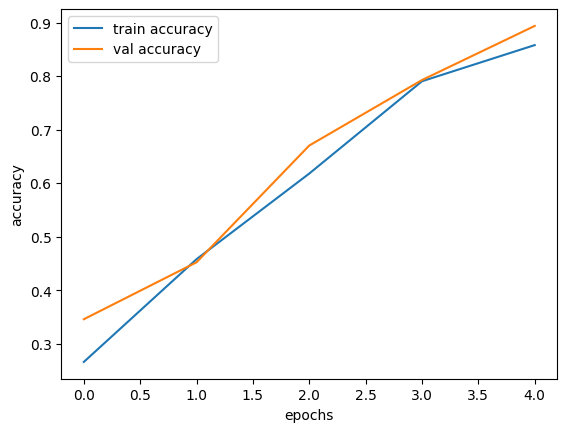

In [35]:
epochs = list(range(epoch))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

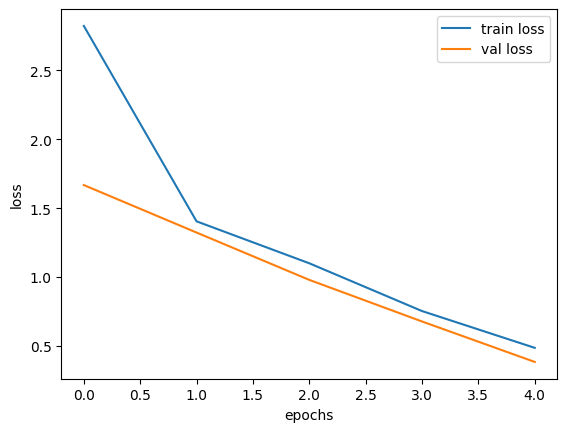

In [36]:
# Display the loss and validation loss graph
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [37]:
model.evaluate(x_val, y_val)

29/29 [==============================] - 0s 3ms/step - loss: 0.3319 - accuracy: 0.9199


[0.33186429738998413, 0.9199134111404419]

In [38]:
y_pred  = model.predict(x_val)
y_pred_labels = np.argmax(y_pred, axis=1) #Index of max  value
#y_pred_labels = encoder.inverse_transform(y_pred_labels) #The inverse_transform method takes the encoded integer class labels (pred_val) and returns the original class names

29/29 [==============================] - 0s 3ms/step


In [39]:
y_test_labels = y_val

In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_labels, y_pred_labels)
accuracy

0.9199134199134199

In [41]:
len(files)

2800

In [42]:
files[:10]

['/content/data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_laud_ps.wav',
 '/content/data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_which_ps.wav',
 '/content/data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_mode_ps.wav',
 '/content/data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_boat_ps.wav',
 '/content/data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_dead_ps.wav',
 '/content/data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_wife_ps.wav',
 '/content/data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_cause_ps.wav',
 '/content/data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_pass_ps.wav',
 '/content/data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_rain_ps.wav',
 '/content/data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_bath_ps.wav']

In [43]:
new_paths = ['/content/data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_laud_ps.wav',
 '/content/data/TESS Toronto emotional speech set data/OAF_Fear/OAF_voice_fear.wav',
 '/content/data/TESS Toronto emotional speech set data/YAF_angry/YAF_shack_angry.wav',
 '/content/data/TESS Toronto emotional speech set data/YAF_disgust/YAF_sail_disgust.wav',
 '/content/data/TESS Toronto emotional speech set data/YAF_happy/YAF_jail_happy.wav',
 '/content/data/TESS Toronto emotional speech set data/YAF_sad/YAF_red_sad.wav']

pred_df = pd.DataFrame({'speech':new_paths})

In [44]:
pred_df['speech']

0    /content/data/TESS Toronto emotional speech se...
1    /content/data/TESS Toronto emotional speech se...
2    /content/data/TESS Toronto emotional speech se...
3    /content/data/TESS Toronto emotional speech se...
4    /content/data/TESS Toronto emotional speech se...
5    /content/data/TESS Toronto emotional speech se...
Name: speech, dtype: object

In [45]:
pred_df['mfcc_features'] = pred_df['speech'].apply(lambda x: create_mfcc_features(x))
pred_features = np.array(pred_df['mfcc_features'].tolist())
pred_features = pred_features.reshape(pred_features.shape[0], 16, 8, 1)
loaded_model = model
pred_probs = loaded_model.predict(pred_features)
pred_labels = np.argmax(pred_probs, axis=1)
predicted_classes = encoder.inverse_transform(pred_labels)


1/1 [==============================] - 0s 40ms/step


In [46]:
predicted_classes

array(['ps', 'fear', 'angry', 'disgust', 'happy', 'sad'], dtype=object)

In [47]:
# new_paths = ['/content/data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_laud_ps.wav',
#  '/content/data/TESS Toronto emotional speech set data/OAF_Fear/OAF_voice_fear.wav',
#  '/content/data/TESS Toronto emotional speech set data/YAF_angry/YAF_shack_angry.wav',
#  '/content/data/TESS Toronto emotional speech set data/YAF_disgust/YAF_sail_disgust.wav',
#  '/content/data/TESS Toronto emotional speech set data/YAF_happy/YAF_jail_happy.wav',
#  '/content/data/TESS Toronto emotional speech set data/YAF_sad/YAF_red_sad.wav']